In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_s = pd.read_csv('szl_data.csv', names = ("Anio", "Mes", "dia", "Hora", "Altura" ), header = 0) #La altura está en mm
df_m = pd.read_csv('Mtry_CA_hr.csv', names = ("Date Time", "Water Level", "Sigma", "I", "L"), header = 0)

In [3]:
df_s.dtypes

Anio       int64
Mes        int64
dia        int64
Hora       int64
Altura    object
dtype: object

In [4]:
df_m.dtypes

Date Time       object
Water Level    float64
Sigma          float64
I                int64
L                int64
dtype: object

In [5]:
df_s['date'] = df_s.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Anio'],x[u'Mes'], x[u'dia'], x[u'Hora']), "%Y %m %d %H"),axis=1)
df_m["Date Time"]= pd.to_datetime(df_m["Date Time"], format = '%Y %m %d %H:%M:')

In [6]:
df_s['Altura']=pd.to_numeric(df_s['Altura'], errors = 'coerce')
df_s.apply(lambda x: sum(x.isnull()),axis=0)

Anio        0
Mes         0
dia         0
Hora        0
Altura    185
date        0
dtype: int64

In [7]:
df_s.dtypes

Anio               int64
Mes                int64
dia                int64
Hora               int64
Altura           float64
date      datetime64[ns]
dtype: object

In [8]:
df_m.apply(lambda x: sum(x.isnull()),axis=0)

Date Time      0
Water Level    0
Sigma          0
I              0
L              0
dtype: int64

In [9]:
szl = df_s[(df_s['date'] >= '2016-01-01 00:00:00') & (df_s['date'] <= '2016-03-31 23:00:00')]
mty = df_m

In [10]:
szl.head(),szl.tail(),mty.head(), mty.tail()

(   Anio  Mes  dia  Hora  Altura                date
 0  2016    1    1     0   670.0 2016-01-01 00:00:00
 1  2016    1    1     1   506.0 2016-01-01 01:00:00
 2  2016    1    1     2   384.0 2016-01-01 02:00:00
 3  2016    1    1     3   330.0 2016-01-01 03:00:00
 4  2016    1    1     4   356.0 2016-01-01 04:00:00,
       Anio  Mes  dia  Hora  Altura                date
 2179  2016    3   31    19   266.0 2016-03-31 19:00:00
 2180  2016    3   31    20   366.0 2016-03-31 20:00:00
 2181  2016    3   31    21   503.0 2016-03-31 21:00:00
 2182  2016    3   31    22   645.0 2016-03-31 22:00:00
 2183  2016    3   31    23   763.0 2016-03-31 23:00:00,
             Date Time  Water Level  Sigma  I  L
 0 2016-12-01 00:00:00        0.035  0.034  0  0
 1 2016-12-01 01:00:00       -0.101  0.049  0  0
 2 2016-12-01 02:00:00       -0.057  0.033  0  0
 3 2016-12-01 03:00:00        0.129  0.042  0  0
 4 2016-12-01 04:00:00        0.383  0.048  0  0,
                Date Time  Water Level  Sigma  I 

In [57]:
z = np.arange(0.0, 2184.0, 1.0)
k = np.arange(0.0, 2160.0, 1.0)

In [58]:
szl['T'] =  pd.Series(z, index =None)
mty['T'] = pd.Series(k, index=None)

C:\Users\Suset\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
szl.head(), szl.tail(), mty.head(), mty.tail()

(   Anio  Mes  dia  Hora  Altura                date    T
 0  2016    1    1     0   670.0 2016-01-01 00:00:00  0.0
 1  2016    1    1     1   506.0 2016-01-01 01:00:00  1.0
 2  2016    1    1     2   384.0 2016-01-01 02:00:00  2.0
 3  2016    1    1     3   330.0 2016-01-01 03:00:00  3.0
 4  2016    1    1     4   356.0 2016-01-01 04:00:00  4.0,
       Anio  Mes  dia  Hora  Altura                date       T
 2179  2016    3   31    19   266.0 2016-03-31 19:00:00  2179.0
 2180  2016    3   31    20   366.0 2016-03-31 20:00:00  2180.0
 2181  2016    3   31    21   503.0 2016-03-31 21:00:00  2181.0
 2182  2016    3   31    22   645.0 2016-03-31 22:00:00  2182.0
 2183  2016    3   31    23   763.0 2016-03-31 23:00:00  2183.0,
             Date Time  Water Level  Sigma  I  L    T
 0 2016-12-01 00:00:00        0.035  0.034  0  0  0.0
 1 2016-12-01 01:00:00       -0.101  0.049  0  0  1.0
 2 2016-12-01 02:00:00       -0.057  0.033  0  0  2.0
 3 2016-12-01 03:00:00        0.129  0.042  0  0  

In [60]:
#Amplitudes encontradas para los armónicos de las mareas de El Sauzal
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 2184
# sample spacing
T = 1.0
y = szl["Altura"]/1000.0
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

A0_s = np.absolute(yf[int(0),]/N)
O1_s = 2.0*np.absolute(yf[int(85),]/N)
S1_s = 2.0*np.absolute(yf[int(91),]/N)
N2_s = 2.0*np.absolute(yf[int(173),]/N)
M2_s =  2.0*np.absolute(yf[int(176),]/N)
S2_s = 2.0*np.absolute(yf[int(182),]/N)
Rho_s = 2.0*np.absolute(yf[int(84),]/N)
A1_s= 2.0*np.absolute(yf[int(90),]/N)
P1_s = 2.0*np.absolute(yf[int(92),]/N)
A2_s = 2.0*np.absolute(yf[int(172),]/N)
A3_s = 2.0*np.absolute(yf[int(174),]/N)
A4_s = 2.0*np.absolute(yf[int(175),]/N)
lbd_2s = 2.0*np.absolute(yf[int(177),]/N)

In [61]:
#Amplitudes encontradas para los armónicos de las mareas de Montere
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N_d = 2160
# sample spacing
T_d = 1.0
y_hr = mty['Water Level']
yf_hr = fft(y_hr)
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
yplot_hr = fftshift(yf_hr)

A0_m = np.absolute(yf_hr[0,]/N_d)
O1_m = 2.0*np.absolute(yf_hr[84,]/N_d)
S1_m = 2.0*np.absolute(yf_hr[90,]/N_d)
N2_m = 2.0*np.absolute(yf_hr[171,]/N_d)
M2_m = 2.0*np.absolute(yf_hr[174,]/N_d)
S2_m = 2.0*np.absolute(yf_hr[180,]/N_d)
Msf_m = 2.0*np.absolute(yf_hr[6,]/N_d)
A1_m = 2.0*np.absolute(yf_hr[7,]/N_d)
rho_m = 2.0*np.absolute(yf_hr[83,]/N_d)
A2_m = 2.0*np.absolute(yf_hr[91,]/N_d)
MU2_m = 2.0*np.absolute(yf_hr[170,]/N_d)
A3_m = 2.0*np.absolute(yf_hr[173,]/N_d)

In [62]:
#Periodos en los que se presentan en el Sauzal
f_O1s = xf[int(1092 +85)]
f_S1s = xf[int(1092 +91),]
f_N2s =  xf[int(1092 +173),]
f_M2s =  xf[int(1092 +176),]
f_S2s =  xf[int(1092 +182),]
f_Rhos =  xf[int(1092 +84),]
f_A1s =  xf[int(1092 +90),]
f_P1s =  xf[int(1092 +92),]
f_A2s =  xf[int(1092 +172),]
f_A3s =  xf[int(1092 +174),]
f_A4s =  xf[int(1092 +175),]
f_lbd2s =  xf[int(1092 +177),]

# Fases que se presentan en el Sauzal
qA0_s = np.angle(yf[int(0),])
qO1_s = np.angle(yf[int(85),])
qS1_s = np.angle(yf[int(91),])
qN2_s = np.angle(yf[int(173),])
qM2_s = np.angle(yf[int(176),])
qS2_s = np.angle(yf[int(182),])
qRho_s =  np.angle(yf[int(84),])
qA1_s =  np.angle(yf[int(90),])
qP1_s =  np.angle(yf[int(92),])
qA2_s =  np.angle(yf[int(172),])
qA3_s =  np.angle(yf[int(174),])
qA4_s =  np.angle(yf[int(175),])
qlbd2s =  np.angle(yf[int(177),])
#Periodos en los que se presentan en el Monterey
f_O1m = xf_hr[int(1080 +84),]
f_S1m = xf_hr[int(1080 +90),]
f_N2m = xf_hr[int(1080 +171),]
f_M2m = xf_hr[int(1080 +174),]
f_S2m = xf_hr[int(1080 +180),]
f_Msfm = xf_hr[int(1080 +6),]
f_A1m = xf_hr[int(1080 +7),]
f_rhom = xf_hr[int(1080 +83),]
f_A2m = xf_hr[int(1080 +91),]
f_MU2m = xf_hr[int(1080 +170),]
f_A3m = xf_hr[int(1080 +173),]

qA0_m = np.angle(yf_hr[0,])
qO1_m = np.angle(yf_hr[84,])
qS1_m = np.angle(yf_hr[90,])
qN2_m = np.angle(yf_hr[171,])
qM2_m = np.angle(yf_hr[174,])
qS2_m = np.angle(yf_hr[180,])
qMsf_m = np.angle(yf_hr[6,])
qA1_m = np.angle(yf_hr[7,])
qrho_m = np.angle(yf_hr[83,])
qA2_m = np.angle(yf_hr[91,])
qMU2_m = np.angle(yf_hr[170,])
qA3_m = np.angle(yf_hr[173,])

In [63]:
qO1_m = np.angle(yf_hr[84,])
qO1_m

1.536385578114936

In [64]:
y= szl['Altura']/1000
w= 2.0*np.pi
a=0
def f(t):
    return A0_s + (O1_s*np.sin(w*f_O1s*t+qO1_s) + S1_s*np.sin(w*f_S1s *t+qS1_s) 
                   + N2_s*np.sin(w*f_N2s*t+qN2_s) + M2_s*np.sin(w*f_M2s*t + qM2_s)
                   + S2_s*np.sin(w*f_S2s*t+qS2_s) + Rho*np.sin(w*f_Rhos*t + qRho_s)
                   + A1_s*np.sin(w*f_A1s*t+qA1_s) + P1_s*np.sin(w*f_P1s*t+ qP1_s)
                   + A2_s*np.sin(w*f_A2s*t+ qA2_s) + A3_s*np.sin(w*f_A3s*t+ qA3_s) 
                   + A4_s*np.sin(w*f_A4s*t+ qA4_s) + lbd_2s*np.sin(w*f_lbd2s*t+ qlbd2s))

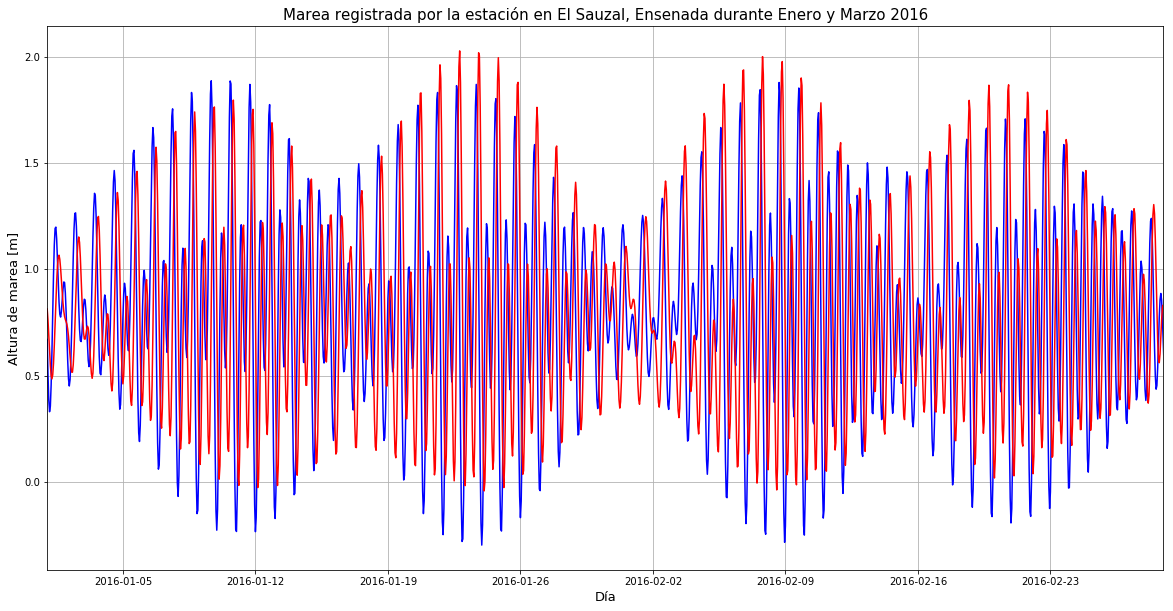

In [65]:
import matplotlib.pyplot as plt
plt.plot(szl['date'], y, 'b-', label ="Altura")
plt.plot(szl['date'], f(szl['T']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp("2016-01-01 00:00:00"), pd.Timestamp('2016-02-28 23:00:00'))
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Marea registrada por la estación en El Sauzal, Ensenada durante Enero y Marzo 2016', fontsize= 15)
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

In [ ]:
y1 = f(szl['T'])
y = szl['Altura']/1000

y1.head(10), y.head(10)

In [ ]:
max(y), max(y1)

In [ ]:
np.mean(np.abs(y1-y))/np.mean(szl['Altura'])*100

In [ ]:
w= 2.0*np.pi
def g(t):
    return A0_m + (O1_m*np.sin(w*f_O1m*t+qO1_m) + S1_m*np.sin(w*f_S1m *t+qS1_m) 
                   + N2_m*np.sin(w*f_N2m*t+qN2_m) + M2_m*np.sin(w*f_M2m*t+qM2_m) 
                   + S2_m*np.sin(w*f_S2m*t+qS2_m))

In [ ]:
plt.plot(mty[u'Date Time'], mty[u'Water Level'], 'g', label ="Altura")
plt.plot(mty['Date Time'], g(mty['T']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp('2017-01-01 00:00:00'), pd.Timestamp('2017-01-05 00:23:00'))
plt.ylabel('Altura de marea [m]')
plt.xlabel('Día')
plt.title('Marea en Monterey, CA,  durante Enero 2017')
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

In [ ]:
y_m = mty['Water Level']
y1_m = g(mty['T'])
y_m.head(10), y1_m.head(10)

In [ ]:
np.mean(np.abs(y1_m-y_m)/np.mean(mty['Water Level']))

In [ ]:
np.mean(y1_m), np.mean(y_m), max(y1_m), max(y_m), min(y1_m), min(y_m)

In [ ]:
np.mean(np.abs(y1_m-y_m))